#BEHAVIOURAL SEGMENT ANALYSIS

In [1]:
import pandas as pd;
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np

In [2]:
behavioural_data_set = pd.read_csv("Bookings-100000-Rows(July).csv");

In [3]:
behavioural_data_set.head()

,Date,Time,Booking_ID,Booking_Status,Customer_ID,Vehicle_Type,Pickup_Location,Drop_Location,V_TAT,C_TAT,...,Canceled_Rides_by_Driver,Incomplete_Rides,Incomplete_Rides_Reason,Booking_Value,Payment_Method,Ride_Distance,Driver_Ratings,Customer_Rating,Vehicle Images,Unnamed: 20
0,2024-07-26 14:00:00,14:00:00,CNR7153255142,Canceled by Driver,CID713523,Prime Sedan,Tumkur Road,RT Nagar,NaN,NaN,...,Personal & Car related issue,NaN,NaN,444,NaN,0,NaN,NaN,#NAME?,NaN
1,2024-07-25 22:20:00,22:20:00,CNR2940424040,Success,CID225428,Bike,Magadi Road,Varthur,203.0,30.0,...,NaN,No,NaN,158,Cash,13,4.1,4.0,#NAME?,NaN
2,2024-07-30 19:59:00,19:59:00,CNR2982357879,Success,CID270156,Prime SUV,Sahakar Nagar,Varthur,238.0,130.0,...,NaN,No,NaN,386,UPI,40,4.2,4.8,#NAME?,NaN
3,2024-07-22 3:15:00,3:15:00,CNR2395710036,Canceled by Customer,CID581320,eBike,HSR Layout,Vijayanagar,NaN,NaN,...,NaN,NaN,NaN,384,NaN,0,NaN,NaN,#NAME?,NaN
4,2024-07-02 9:02:00,9:02:00,CNR1797421769,Success,CID939555,Mini,Rajajinagar,Chamarajpet,252.0,80.0,...,NaN,No,NaN,822,Credit Card,45,4.0,3.0,#NAME?,NaN


In [4]:
behavioural_data_set.describe()

,V_TAT,C_TAT,Booking_Value,Ride_Distance,Driver_Ratings,Customer_Rating,Unnamed: 20
count,63967.000000,63967.000000,103024.000000,103024.000000,63967.000000,63967.000000,0.0
mean,170.876952,84.873372,548.751883,14.189927,3.997457,3.998313,NaN
std,80.803640,36.005100,536.541221,15.776270,0.576834,0.578957,NaN
min,35.000000,25.000000,100.000000,0.000000,3.000000,3.000000,NaN
25%,98.000000,55.000000,242.000000,0.000000,3.500000,3.500000,NaN
50%,168.000000,85.000000,386.000000,8.000000,4.000000,4.000000,NaN
75%,238.000000,115.000000,621.000000,26.000000,4.500000,4.500000,NaN
max,308.000000,145.000000,2999.000000,49.000000,5.000000,5.000000,NaN


In [5]:
behavioural_data_set.shape


(103024, 21)

CLEANING BEHAVIOURAL DATA -EDA

In [6]:
columns_to_drop = [
    'Date', 'Time', 'Booking_ID', 'Customer_ID', 'Pickup_Location',
    'Drop_Location', 'V_TAT', 'C_TAT','Canceled_Rides_by_Customer', 'Canceled_Rides_by_Driver',
    'Incomplete_Rides', 'Incomplete_Rides_Reason', 'Vehicle Images', 'Unnamed: 20'
]
cleaned_behavioural_data = behavioural_data_set.drop(columns = columns_to_drop)

In [7]:
cleaned_behavioural_data.head(10)

,Booking_Status,Vehicle_Type,Booking_Value,Payment_Method,Ride_Distance,Driver_Ratings,Customer_Rating
0,Canceled by Driver,Prime Sedan,444,NaN,0,NaN,NaN
1,Success,Bike,158,Cash,13,4.1,4.0
2,Success,Prime SUV,386,UPI,40,4.2,4.8
3,Canceled by Customer,eBike,384,NaN,0,NaN,NaN
4,Success,Mini,822,Credit Card,45,4.0,3.0
5,Success,Mini,173,UPI,41,3.4,4.6
6,Success,Bike,140,Cash,49,3.2,4.5
7,Canceled by Driver,Prime Plus,344,NaN,0,NaN,NaN
8,Driver Not Found,Mini,839,NaN,0,NaN,NaN
9,Canceled by Driver,Auto,893,NaN,0,NaN,NaN


In [8]:
cleaned_behavioural_data.describe

<bound method NDFrame.describe of               Booking_Status Vehicle_Type  Booking_Value Payment_Method  \
0         Canceled by Driver  Prime Sedan            444            NaN   
1                    Success         Bike            158           Cash   
2                    Success    Prime SUV            386            UPI   
3       Canceled by Customer        eBike            384            NaN   
4                    Success         Mini            822    Credit Card   
...                      ...          ...            ...            ...   
103019               Success   Prime Plus            111           Cash   
103020               Success         Auto           1097            UPI   
103021               Success    Prime SUV           2201           Cash   
103022               Success        eBike            267            UPI   
103023               Success         Auto            462            UPI   

        Ride_Distance  Driver_Ratings  Customer_Rating  
0       

In [9]:
cleaned_behavioural_data.isnull().sum()

Booking_Status         0
Vehicle_Type           0
Booking_Value          0
Payment_Method     39057
Ride_Distance          0
Driver_Ratings     39057
Customer_Rating    39057
dtype: int64

In [10]:
# Fill missing payment method with 'Unknown'
cleaned_behavioural_data['Payment_Method'].fillna('Unknown', inplace=True)

C:\Users\Workspace\AppData\Local\Temp\ipykernel_9856\3312220954.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cleaned_behavioural_data['Payment_Method'].fillna('Unknown', inplace=True)


In [11]:
# Fill missing ratings with median value
cleaned_behavioural_data['Driver_Ratings'].fillna(cleaned_behavioural_data['Driver_Ratings'].median(), inplace=True)
cleaned_behavioural_data['Customer_Rating'].fillna(cleaned_behavioural_data['Customer_Rating'].median(), inplace=True)


C:\Users\Workspace\AppData\Local\Temp\ipykernel_9856\2474605570.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cleaned_behavioural_data['Driver_Ratings'].fillna(cleaned_behavioural_data['Driver_Ratings'].median(), inplace=True)
C:\Users\Workspace\AppData\Local\Temp\ipykernel_9856\2474605570.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediat

In [12]:
cleaned_behavioural_data.isnull().sum()

Booking_Status     0
Vehicle_Type       0
Booking_Value      0
Payment_Method     0
Ride_Distance      0
Driver_Ratings     0
Customer_Rating    0
dtype: int64

In [13]:
cleaned_behavioural_data.head(10)

,Booking_Status,Vehicle_Type,Booking_Value,Payment_Method,Ride_Distance,Driver_Ratings,Customer_Rating
0,Canceled by Driver,Prime Sedan,444,Unknown,0,4.0,4.0
1,Success,Bike,158,Cash,13,4.1,4.0
2,Success,Prime SUV,386,UPI,40,4.2,4.8
3,Canceled by Customer,eBike,384,Unknown,0,4.0,4.0
4,Success,Mini,822,Credit Card,45,4.0,3.0
5,Success,Mini,173,UPI,41,3.4,4.6
6,Success,Bike,140,Cash,49,3.2,4.5
7,Canceled by Driver,Prime Plus,344,Unknown,0,4.0,4.0
8,Driver Not Found,Mini,839,Unknown,0,4.0,4.0
9,Canceled by Driver,Auto,893,Unknown,0,4.0,4.0


In [14]:
cleaned_behavioural_data['Booking_Status'].value_counts()


Booking_Status
Success                 63967
Canceled by Driver      18434
Canceled by Customer    10499
Driver Not Found        10124
Name: count, dtype: int64

In [15]:
Booking_status_cleaned = cleaned_behavioural_data['Booking_Status'].replace({
    'Success': 1,
    'Canceled by Driver': 0,
    'Canceled by Customer': 0,
    'Driver Not Found': 0
}) 

C:\Users\Workspace\AppData\Local\Temp\ipykernel_9856\1309764157.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Booking_status_cleaned = cleaned_behavioural_data['Booking_Status'].replace({


In [16]:
Booking_status_cleaned.value_counts()

Booking_Status
1    63967
0    39057
Name: count, dtype: int64

In [17]:
Booking_status_cleaned.isnull().sum()

np.int64(0)

In [18]:
cleaned_behavioural_data['Booking_Status'] = Booking_status_cleaned

In [19]:
cleaned_behavioural_data.isnull().sum()

Booking_Status     0
Vehicle_Type       0
Booking_Value      0
Payment_Method     0
Ride_Distance      0
Driver_Ratings     0
Customer_Rating    0
dtype: int64

In [20]:
cleaned_behavioural_data.head(10)

,Booking_Status,Vehicle_Type,Booking_Value,Payment_Method,Ride_Distance,Driver_Ratings,Customer_Rating
0,0,Prime Sedan,444,Unknown,0,4.0,4.0
1,1,Bike,158,Cash,13,4.1,4.0
2,1,Prime SUV,386,UPI,40,4.2,4.8
3,0,eBike,384,Unknown,0,4.0,4.0
4,1,Mini,822,Credit Card,45,4.0,3.0
5,1,Mini,173,UPI,41,3.4,4.6
6,1,Bike,140,Cash,49,3.2,4.5
7,0,Prime Plus,344,Unknown,0,4.0,4.0
8,0,Mini,839,Unknown,0,4.0,4.0
9,0,Auto,893,Unknown,0,4.0,4.0


In [21]:
cleaned_behavioural_data['Payment_Method'].value_counts()

Payment_Method
Unknown        39057
Cash           35022
UPI            25881
Credit Card     2435
Debit Card       629
Name: count, dtype: int64

In [22]:
offline = cleaned_behavioural_data['Payment_Method'].replace({
    'Unknown': 0,
    'Cash': 1,
    'UPI': 0,
    'Credit Card': 0,  
    'Debit Card': 0
})

C:\Users\Workspace\AppData\Local\Temp\ipykernel_9856\3647070859.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  offline = cleaned_behavioural_data['Payment_Method'].replace({


In [23]:
offline.value_counts()

Payment_Method
0    68002
1    35022
Name: count, dtype: int64

In [24]:
offline.isnull().sum()

np.int64(0)

In [25]:
cleaned_behavioural_data.drop(columns = {'Payment_Method'}, inplace = True)

In [26]:
cleaned_behavioural_data["Offline_Payment"] = offline 

In [27]:
cleaned_behavioural_data.head(10)

,Booking_Status,Vehicle_Type,Booking_Value,Ride_Distance,Driver_Ratings,Customer_Rating,Offline_Payment
0,0,Prime Sedan,444,0,4.0,4.0,0
1,1,Bike,158,13,4.1,4.0,1
2,1,Prime SUV,386,40,4.2,4.8,0
3,0,eBike,384,0,4.0,4.0,0
4,1,Mini,822,45,4.0,3.0,0
5,1,Mini,173,41,3.4,4.6,0
6,1,Bike,140,49,3.2,4.5,1
7,0,Prime Plus,344,0,4.0,4.0,0
8,0,Mini,839,0,4.0,4.0,0
9,0,Auto,893,0,4.0,4.0,0


In [28]:
cleaned_behavioural_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103024 entries, 0 to 103023
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Booking_Status   103024 non-null  int64  
 1   Vehicle_Type     103024 non-null  object 
 2   Booking_Value    103024 non-null  int64  
 3   Ride_Distance    103024 non-null  int64  
 4   Driver_Ratings   103024 non-null  float64
 5   Customer_Rating  103024 non-null  float64
 6   Offline_Payment  103024 non-null  int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 5.5+ MB


In [29]:
cleaned_behavioural_data.describe()

,Booking_Status,Booking_Value,Ride_Distance,Driver_Ratings,Customer_Rating,Offline_Payment
count,103024.000000,103024.000000,103024.000000,103024.000000,103024.000000,103024.000000
mean,0.620894,548.751883,14.189927,3.998421,3.998953,0.339940
std,0.485167,536.541221,15.776270,0.454528,0.456199,0.473691
min,0.000000,100.000000,0.000000,3.000000,3.000000,0.000000
25%,0.000000,242.000000,0.000000,3.800000,3.800000,0.000000
50%,1.000000,386.000000,8.000000,4.000000,4.000000,0.000000
75%,1.000000,621.000000,26.000000,4.200000,4.200000,1.000000
max,1.000000,2999.000000,49.000000,5.000000,5.000000,1.000000


VISUAL STUDY OF BEHAVIOURAL DATA 

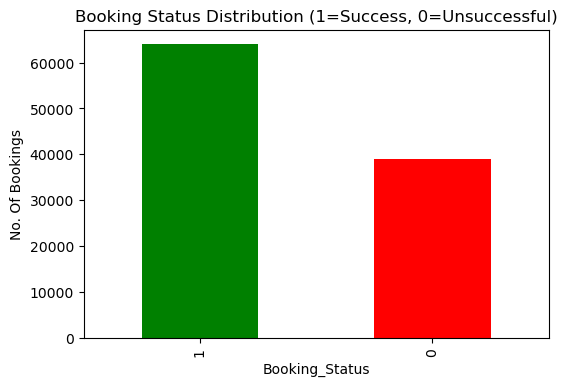

In [30]:
cleaned_behavioural_data['Booking_Status'].value_counts().plot(
    kind = 'bar',
    color = ['green','red'],
    figsize = (6,4),
    title = 'Booking Status Distribution (1=Success, 0=Unsuccessful)'
)
plt.ylabel('No. Of Bookings')
plt.show()

In [31]:
cleaned_behavioural_data['Vehicle_Type'].value_counts()

Vehicle_Type
Prime Sedan    14877
eBike          14816
Auto           14755
Prime Plus     14707
Bike           14662
Prime SUV      14655
Mini           14552
Name: count, dtype: int64

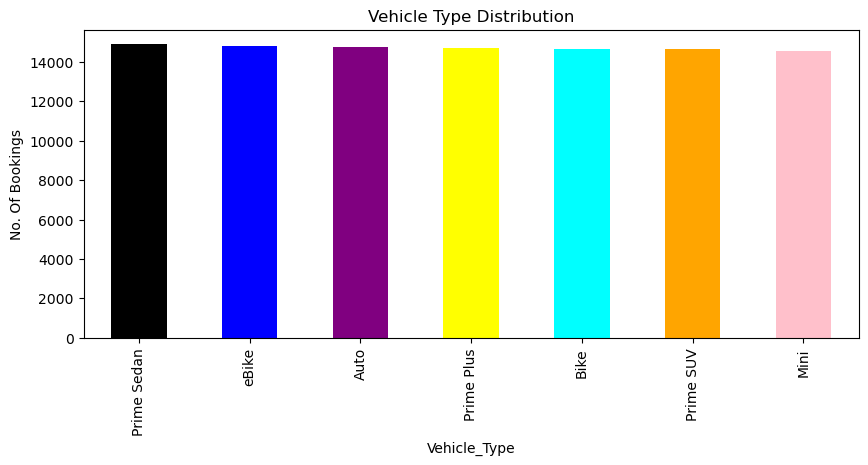

In [32]:
cleaned_behavioural_data['Vehicle_Type'].value_counts().plot(
    kind = 'bar',
    color = ['black','blue','purple','yellow','cyan','orange','pink'],
    figsize = (10,4),
    title = 'Vehicle Type Distribution'
)
plt.ylabel('No. Of Bookings')
plt.show()

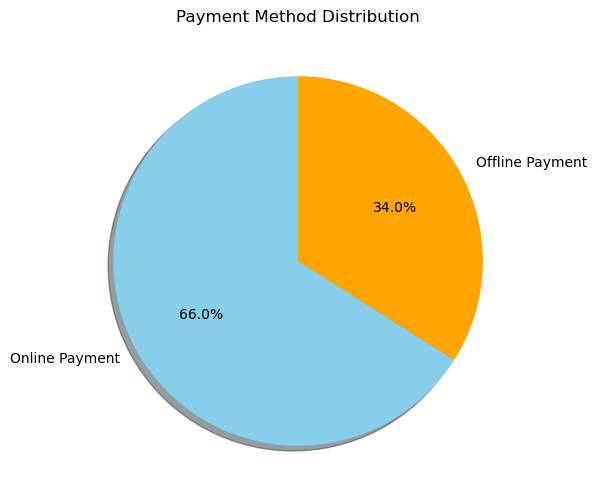

In [33]:
cleaned_behavioural_data['Offline_Payment'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    labels=['Online Payment', 'Offline Payment'],
    colors=['skyblue', 'orange'],
    startangle=90,
    shadow=True,
    figsize=(6,6),
    title='Payment Method Distribution'
)
plt.ylabel('')
plt.show()

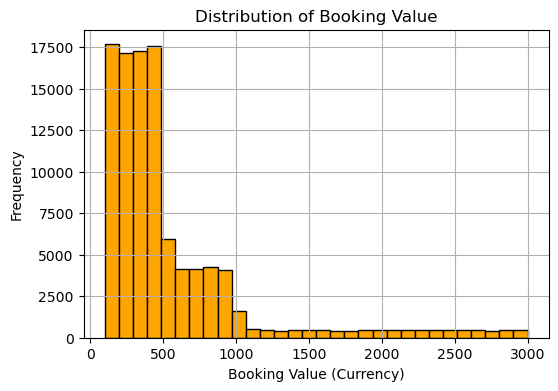

In [34]:
cleaned_behavioural_data['Booking_Value'].hist(
    bins=30, 
    color='orange',
    edgecolor='black',
    figsize=(6,4)
)
plt.title('Distribution of Booking Value')
plt.xlabel('Booking Value (Currency)')
plt.ylabel('Frequency')
plt.show()


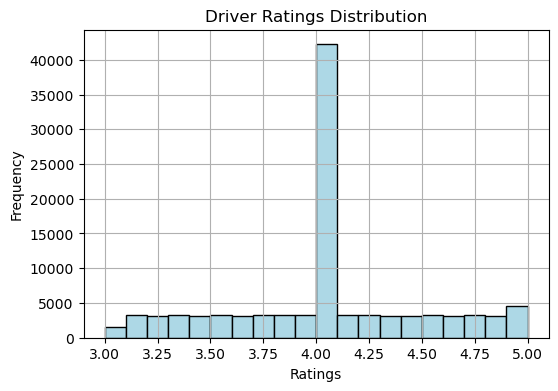

In [35]:
cleaned_behavioural_data['Driver_Ratings'].hist(
    bins=20, 
    color='lightblue',
    edgecolor='black',
    figsize=(6,4)
)
plt.title('Driver Ratings Distribution')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.show()

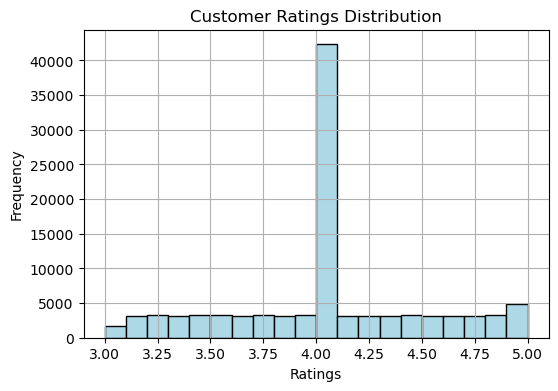

In [36]:
cleaned_behavioural_data['Customer_Rating'].hist(
    bins=20, 
    color='lightblue',
    edgecolor='black',
    figsize=(6,4)
)
plt.title('Customer Ratings Distribution')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.show()

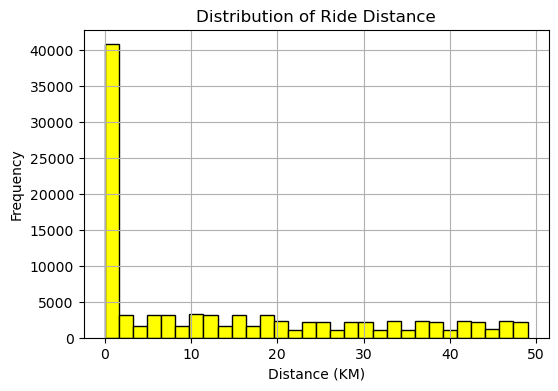

In [37]:
cleaned_behavioural_data['Ride_Distance'].hist(
    bins=30, 
    color='yellow',
    edgecolor='black',
    figsize=(6,4)
)
plt.title('Distribution of Ride Distance')
plt.xlabel('Distance (KM)')
plt.ylabel('Frequency')
plt.show()


In [38]:
cleaned_behavioural_data.head()

,Booking_Status,Vehicle_Type,Booking_Value,Ride_Distance,Driver_Ratings,Customer_Rating,Offline_Payment
0,0,Prime Sedan,444,0,4.0,4.0,0
1,1,Bike,158,13,4.1,4.0,1
2,1,Prime SUV,386,40,4.2,4.8,0
3,0,eBike,384,0,4.0,4.0,0
4,1,Mini,822,45,4.0,3.0,0


In [39]:
#booking behaviour
booking_cluster_behavioural_data = cleaned_behavioural_data[["Ride_Distance","Booking_Value"]].copy()
#service Quality 
ServiceQuality_cluster_behavioural_data = cleaned_behavioural_data[["Driver_Ratings","Customer_Rating"]].copy()
#payment Behaviour
PaymentBehavior_cluster_behavioural_data = cleaned_behavioural_data[["Offline_Payment"]].copy()

#booking_cluster_behavioural_data k-means clustering

In [40]:
booking_cluster_behavioural_data.head()

,Ride_Distance,Booking_Value
0,0,444
1,13,158
2,40,386
3,0,384
4,45,822


In [41]:
scaler = StandardScaler()

In [42]:
#booking behaviour scaled
booking_cluster_behavioural_data_scaled = scaler.fit_transform(booking_cluster_behavioural_data)

In [43]:
#service Quality scaled
scaler = StandardScaler()
ServiceQuality_cluster_behavioural_data_scaled = scaler.fit_transform(ServiceQuality_cluster_behavioural_data)

In [44]:
#payment Behaviour scaled
scaler = StandardScaler()
PaymentBehavior_cluster_behavioural_data_scaled = scaler.fit_transform(PaymentBehavior_cluster_behavioural_data)

#K-means clustering of booking behaviour

In [45]:
wcss = []
for i in range(1,11):
    booking_kmeans = KMeans(n_clusters = i, random_state = 42)
    booking_kmeans.fit_transform(booking_cluster_behavioural_data_scaled )
    wcss.append(booking_kmeans.inertia_)

Text(0.5, 1.0, 'Elbow Method - Booking Behaviour')

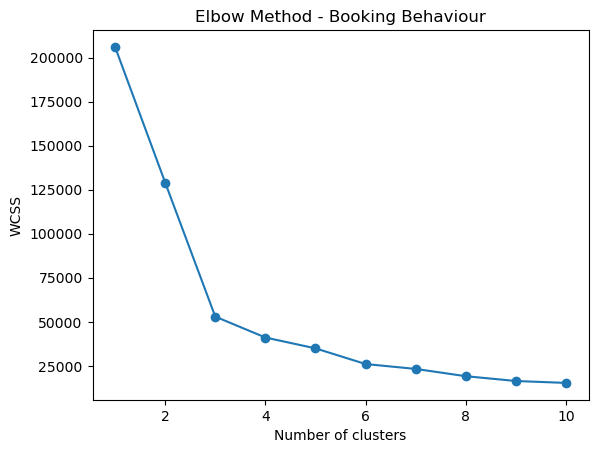

In [46]:
plt.plot(range(1,11), wcss, marker = 'o')
plt.ylabel('WCSS')
plt.xlabel('Number of clusters')
plt.title('Elbow Method - Booking Behaviour')


In [47]:
booking_behavioural_kmeans = KMeans(n_clusters = 3, random_state = 42)

In [48]:
booking_clusters = booking_behavioural_kmeans.fit_predict(booking_cluster_behavioural_data_scaled)
booking_cluster_behavioural_data['Cluster'] = booking_clusters


In [49]:
booking_cluster_behavioural_data.head()

,Ride_Distance,Booking_Value,Cluster
0,0,444,2
1,13,158,2
2,40,386,0
3,0,384,2
4,45,822,0


#PlOTTING OF BOOKING BEAHVIOUR

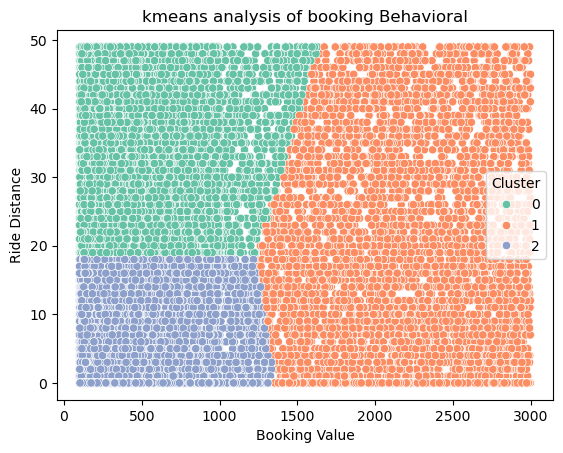

In [50]:
sns.scatterplot(
    x = 'Booking_Value',
    y = 'Ride_Distance',
    hue = 'Cluster',
    data = booking_cluster_behavioural_data,
    palette = 'Set2'
)
plt.xlabel('Booking Value')
plt.ylabel('Ride Distance')
plt.title("kmeans analysis of booking Behavioral")
plt.show()

#K-means clustering of Service Quality

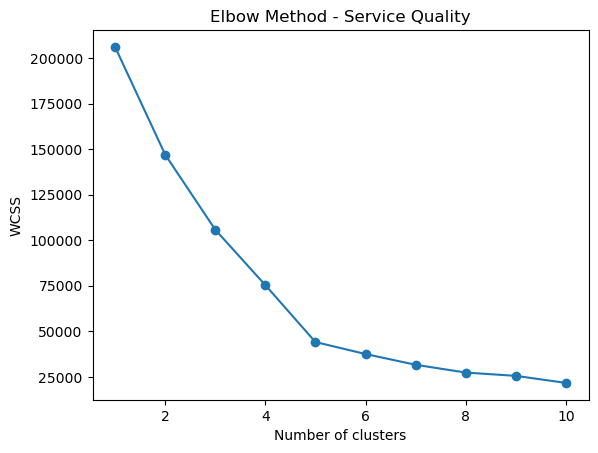

In [51]:
wcss = []
for i in range(1, 11):
    ServiceQuality_kmeans = KMeans(n_clusters=i, random_state=42)
    ServiceQuality_kmeans.fit(ServiceQuality_cluster_behavioural_data_scaled)
    wcss.append(ServiceQuality_kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method - Service Quality')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [52]:
ServiceQuality_kmeans = KMeans(n_clusters=5, random_state=42)
ServiceQuality_clusters = ServiceQuality_kmeans.fit_predict(ServiceQuality_cluster_behavioural_data_scaled)
ServiceQuality_cluster_behavioural_data['Clusters'] = ServiceQuality_clusters

In [53]:
ServiceQuality_cluster_behavioural_data.head()

,Driver_Ratings,Customer_Rating,Clusters
0,4.0,4.0,3
1,4.1,4.0,3
2,4.2,4.8,0
3,4.0,4.0,3
4,4.0,3.0,1


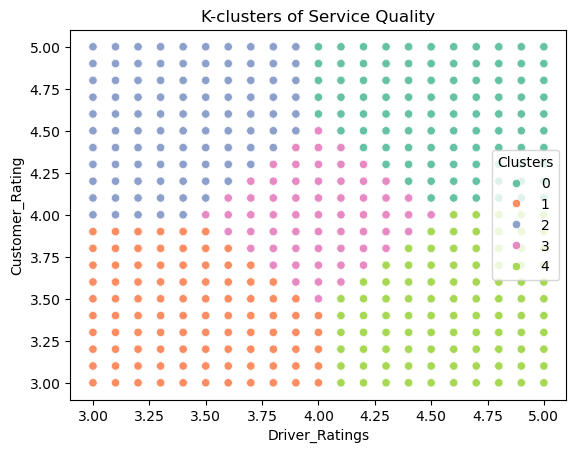

In [54]:
sns.scatterplot(
    x = 'Driver_Ratings',
    y = 'Customer_Rating',
    hue = 'Clusters',
    palette = 'Set2',
    data = ServiceQuality_cluster_behavioural_data
)
plt.xlabel('Driver_Ratings')
plt.ylabel('Customer_Rating')
plt.title('K-clusters of Service Quality')
plt.show()


#K-means clustering of Payment Behaviour


In [55]:
PaymentBehavior_cluster_behavioural_data.head()

,Offline_Payment
0,0
1,1
2,0
3,0
4,0


In [56]:
PaymentBehavior_kmeans = KMeans(n_clusters=2, random_state=42)
PaymentBehavior_clusters = ServiceQuality_kmeans.fit_predict(PaymentBehavior_cluster_behavioural_data_scaled)
PaymentBehavior_cluster_behavioural_data['Clusters'] = PaymentBehavior_clusters

D:\Workspace\Anaconda\Lib\site-packages\sklearn\base.py:1389: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


#plotting of Payment Behaviour k-means cluster 

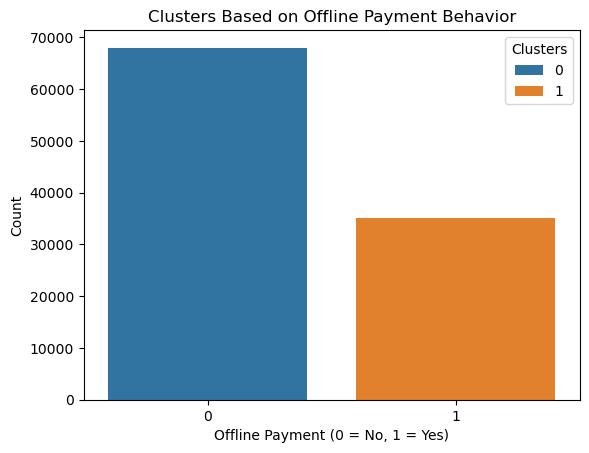

In [57]:
sns.countplot(x='Offline_Payment', hue='Clusters', data=PaymentBehavior_cluster_behavioural_data)
plt.title('Clusters Based on Offline Payment Behavior')
plt.xlabel('Offline Payment (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.legend(title='Clusters')
plt.show()